## TODO: incluir medidas de demora de
- [x] Entrega de paquetes a la app del node 5 (delay)
- [x] Cantidad de saltos utilizados por cada paquete (hopCount)
- [x] Utilización de los buffers de la red (Buffer Size)
- [] Utilización de los enlaces de la red

Entre otros que el alumno crea conveniente.

- [x] Separar delay por origen (Delay y Source)
- [x] Paquetes llegados a node 5 app por origen (Source)
- [x] Cantidad de saltos utilizados por cada paquete por origen (hopCount y Source)

In [40]:
# FIXME: 
# 1) Utilización de los recursos de la red (buffers y enlaces) se refiere a Buffer Size?
# 2) Para la parte 2 seguro se utilizara link[1] por lo que habria que cambiar los graficos CREO
# 3) Modularizar el codigo para que sea mas facil de leer por los demas miembros y de mantener
# Modularizar extraccion de valores
# Modularizar graficos
# Modularizar creacion de arrays separados por origen
# ...

In [41]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import os # librería para interactuar con el sistema de archivos 
import numpy as np #librería para estadisticas

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

#      [P1,P2]
data = [[],[]]
file_names = [[],[]]
for p in range(2):
    # Archivos
    dir = f'../DATA/Parte-{p+1}/'
    archivos = os.listdir(dir)

    # Ordeno los archivos para que queden simpre en orden:
    archivos.sort()

    # Cargamos los datos de los archivos en el array `data`
    # se mapea la info de cada parte m y caso n al arreglo de la posision m-1 en su posicion n-1
    for c in range(len(archivos)):
        aux = pandas.read_csv(dir + archivos[c])
        data[p].append(aux)

    print(f"\nParte {p+1}:")
    print("Archivos cargados: ",', '.join(archivos))
    
    for archivo in archivos:
        nombre = archivo.replace('.csv', '').replace('-', ' ')
        file_names[p].append(nombre)

    print("Nombres de archivos: ",', '.join(file_names[p]))

# NOTE: Variables globales
# nodes_number = data[0].loc[(data[0]['type'] == 'config') & (data[0]['attrname'] == 'Network.nodesNumber'), 'attrvalue'].tolist()
nodes_number = 8
output_folder = './IMGs/'
guardar_graficos = True

# Nombres de archivos
Bufferes = 'Bufferes'
CantidadXFuente_Node5 = 'CantidadXFuente_Node5'
Delay_Node5 = 'Delay_Node5'
DelayXFuente_Node5 = 'DelayXFuente_Node5'
SaltosXFuente_Node5 = 'SaltosXFuente_Node5'

# NOTE: Funciones auxiliares
# def put_time_values(minTimeList, maxTimeList): anda mal xd y ni se si usarla
#     '''
#     timeList1 y maxTimeList son listas de tiempos.
#     Si len(minTimeList) >= len(maxTimeList), entonces se retorna minTimeList.
#     Si len(minTimeList) < len(maxTimeList), entonces se retorna minTimeList extendida con sus 
#     valores repetidos segun los valores de maxTimeList tal que minTimeList[i] <= maxTimeList[i].
#     '''
#     ret = []
#     count = 0
#     while count < len(minTimeList) and minTimeList[count] > maxTimeList[0]:
#         count += 1
#     for i in range(len(maxTimeList)):
#         if count < len(minTimeList) and minTimeList[count] <= maxTimeList[i] :
#             ret.append(minTimeList[count])
#             count += 1
#         else:
#             ret.append(minTimeList[count-1])
#     return ret

data[1][0]


Parte 1:
Archivos cargados:  Parte-1-Caso-1.csv, Parte-1-Caso-2.csv
Nombres de archivos:  Parte 1 Caso 1, Parte 1 Caso 2

Parte 2:
Archivos cargados:  Parte-2-Caso-1.csv, Parte-2-Caso-2.csv
Nombres de archivos:  Parte 2 Caso 1, Parte 2 Caso 2


,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,datetime,20240531-21:15:01,NaN,NaN
2,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,datetimef,20240531-211501,NaN,NaN
3,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20240531-21:15:01-15950,runattr,NaN,NaN,network,Network,NaN,NaN


## Entrega de paquetes a la app del node 5 por fuente

Gráfico guardado en ./IMGs/DelayXFuente_Node5_P1C1.png


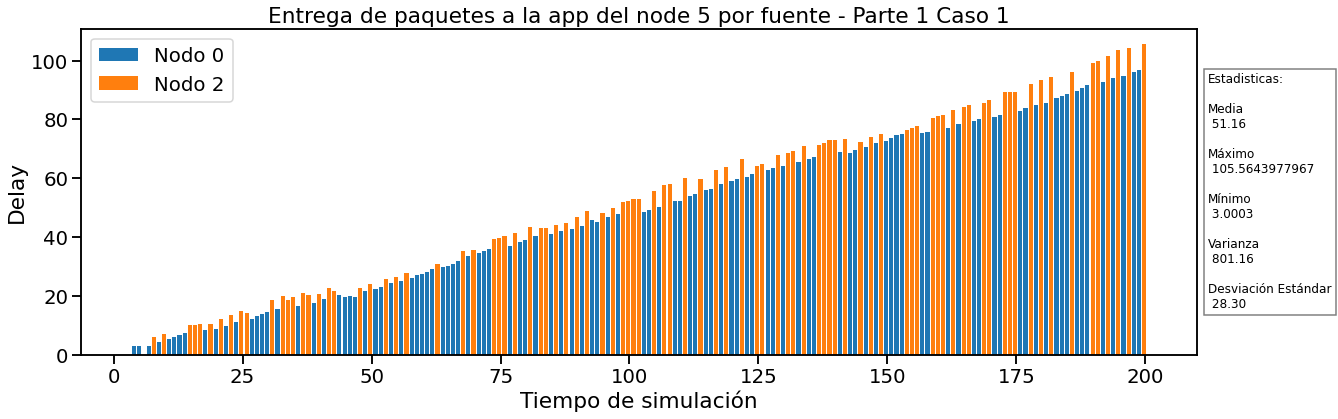

Gráfico guardado en ./IMGs/DelayXFuente_Node5_P1C2.png


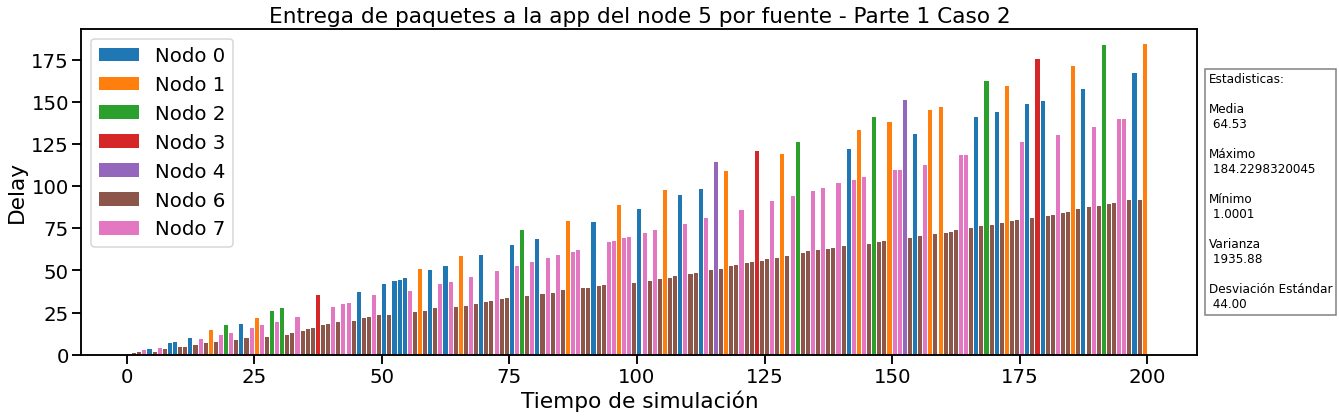

Gráfico guardado en ./IMGs/DelayXFuente_Node5_P2C1.png


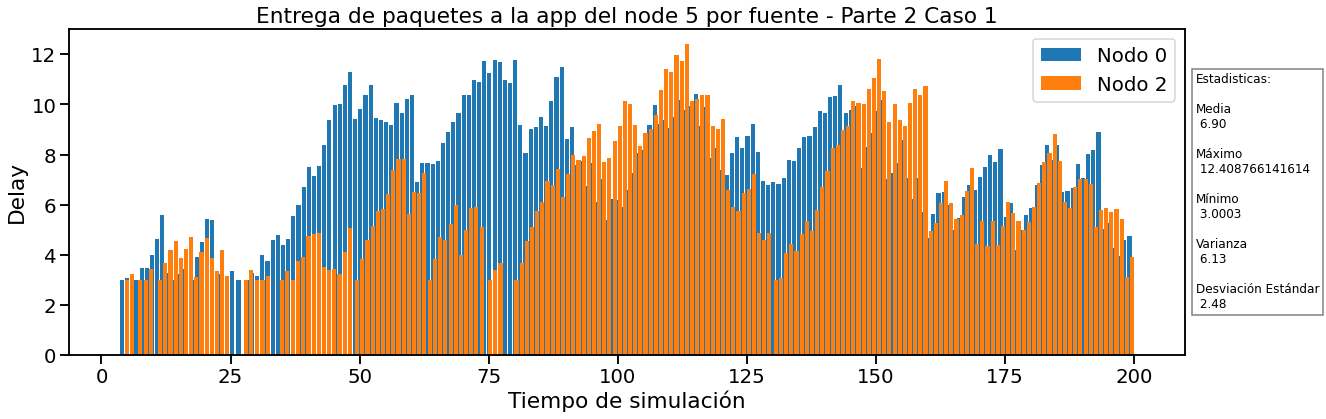

Gráfico guardado en ./IMGs/DelayXFuente_Node5_P2C2.png


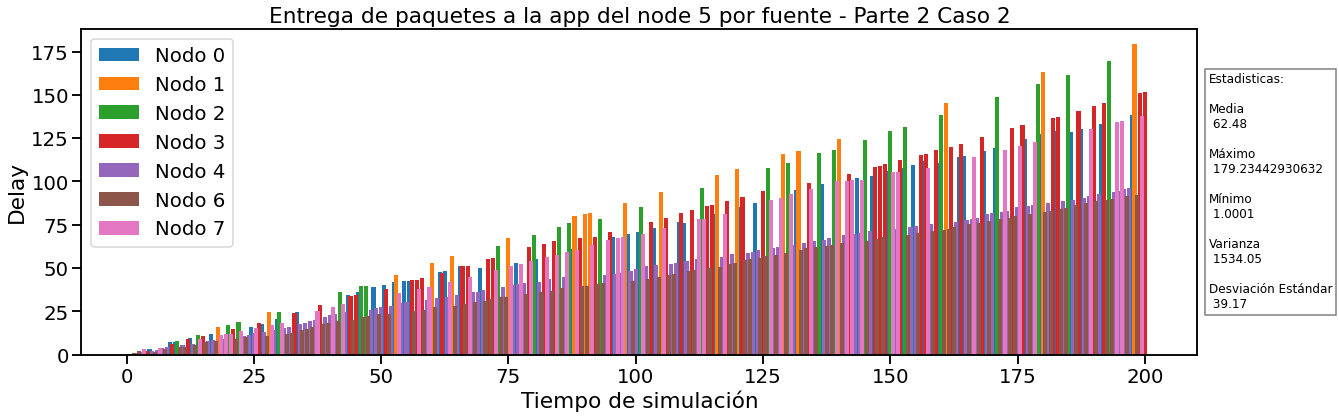

In [42]:
for p in range(2):
    parte = data[p]
    for c in range(len(parte)):
        caso = parte[c]

        # Extraemos los valores
        delayToNode5_value = caso.loc[(caso['module'] == 'Network.node[5].app') & (caso['name'] == 'Delay'), 'vecvalue'].tolist()
        delayToNode5_value = list(map(float,delayToNode5_value[0].split()))

        delayToNode5_time = caso.loc[(caso['module'] == 'Network.node[5].app') & (caso['name'] == 'Delay'), 'vectime'].tolist()
        delayToNode5_time = list(map(float,delayToNode5_time[0].split()))

        source_value = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'Source'), 'vecvalue'].tolist()
        source_value = list(map(int,source_value[0].split()))

        source_time = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'Source'), 'vectime'].tolist()
        source_time = list(map(float,source_time[0].split()))

        # Calculamos el delay de cada source
        assert delayToNode5_time == source_time, "Los tiempos de los delay y source no coinciden"
        sourceNumbers = list(set(source_value))
        delay_source = {key: [] for key in sourceNumbers}
        time_source = {key: [] for key in sourceNumbers}
        for i in range(len(delayToNode5_time)): 
            delay_source[source_value[i]].append(delayToNode5_value[i])
            time_source[source_value[i]].append(delayToNode5_time[i])
        size = 0
        for i in sourceNumbers:
            size = size + len(delay_source[i])
            assert size <= len(delayToNode5_value), f"Los tamaños de los datos no coinciden"

        # Graficamos
        # fig, ax = plt.subplots(len(sourceNumbers),figsize=(20, len(sourceNumbers)*4))
        # fig.suptitle(f'Entrega de paquetes a la app del node 5 por fuente - {file_names[p][c]}')
        # plt.xlabel("tiempo de simulacion")
        # #
        # for i in range(len(sourceNumbers)):
        #     ax[i].bar(time_source[sourceNumbers[i]],delay_source[sourceNumbers[i]], label="delay")
        #     ax[i].set_ylabel(f"Nodo {sourceNumbers[i]}")
        #     ax[i].legend()
        #     assert (len(time_source[sourceNumbers[i]]) + len(delay_source[sourceNumbers[i]])/2 <= len(delayToNode5_value)), f"Los tamaños de los datos no coinciden"
        # plt.show
        #
        plt.figure(figsize=(20, 6))
        for i in range(len(sourceNumbers)):
            plt.bar(time_source[sourceNumbers[i]],delay_source[sourceNumbers[i]], label=f"Nodo {sourceNumbers[i]}")
        plt.title(f'Entrega de paquetes a la app del node 5 por fuente - {file_names[p][c]}')
        plt.xlabel('Tiempo de simulación')
        plt.ylabel('Delay')
        plt.legend()

        # Agregar estadísticas al gráfico
        mean_val = np.mean(delayToNode5_value)
        max_val = np.max(delayToNode5_value)
        min_val = np.min(delayToNode5_value)
        variance_val = np.var(delayToNode5_value)
        std_dev_val = np.std(delayToNode5_value)
        stats_text = f'Estadisticas:\n\nMedia\n {mean_val:.2f}\n\nMáximo\n {max_val}\n\nMínimo\n {min_val}\n\nVarianza\n {variance_val:.2f}\n\nDesviación Estándar\n {std_dev_val:.2f}'
        plt.gca().text(1.01, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

        if guardar_graficos:
            # Guarda la figura en el folder especificado
            file_path = os.path.join(output_folder, DelayXFuente_Node5 + f'_P{p + 1}C{c + 1}.png')
            plt.savefig(file_path)
            print(f"Gráfico guardado en {file_path}")

        plt.show()
        plt.close()


## Paquetes llegados a node 5 app por fuente


Parte 1, Caso 1:[0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2]
Gráfico guardado en ./IMGs/CantidadXFuente_Node5_P1C1.png


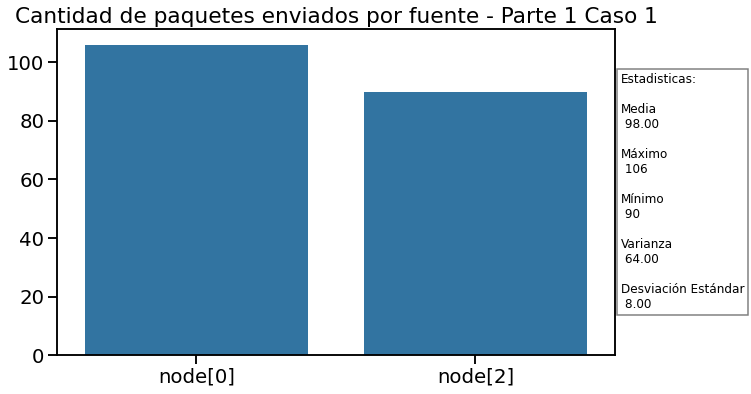


Parte 1, Caso 2:[6, 6, 7, 0, 6, 7, 6, 0, 0, 6, 6, 0, 6, 7, 6, 1, 6, 7, 2, 7, 6, 0, 6, 7, 1, 7, 6, 2, 7, 2, 6, 6, 7, 6, 6, 6, 3, 6, 6, 7, 6, 7, 7, 6, 0, 6, 6, 7, 6, 0, 6, 0, 0, 0, 7, 6, 1, 6, 0, 6, 7, 0, 7, 6, 1, 6, 7, 6, 0, 6, 6, 7, 6, 6, 0, 7, 2, 6, 7, 0, 6, 7, 6, 7, 6, 1, 7, 7, 6, 6, 0, 6, 6, 7, 7, 1, 7, 7, 6, 0, 7, 6, 7, 6, 1, 6, 6, 0, 7, 6, 6, 0, 7, 6, 4, 6, 1, 6, 6, 7, 6, 6, 3, 6, 6, 7, 6, 1, 6, 7, 2, 6, 6, 7, 6, 7, 6, 6, 7, 6, 0, 7, 1, 7, 6, 2, 6, 6, 1, 7, 7, 4, 6, 0, 6, 7, 1, 6, 1, 6, 6, 6, 7, 7, 6, 0, 6, 2, 6, 0, 6, 1, 6, 6, 7, 0, 6, 3, 0, 6, 6, 7, 6, 6, 1, 6, 0, 6, 7, 6, 2, 6, 6, 7, 7, 6, 0, 6, 1]
Gráfico guardado en ./IMGs/CantidadXFuente_Node5_P1C2.png


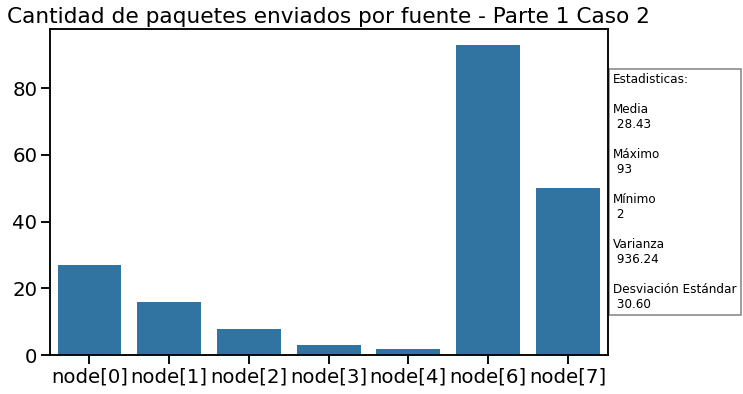


Parte 2, Caso 1:[0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0

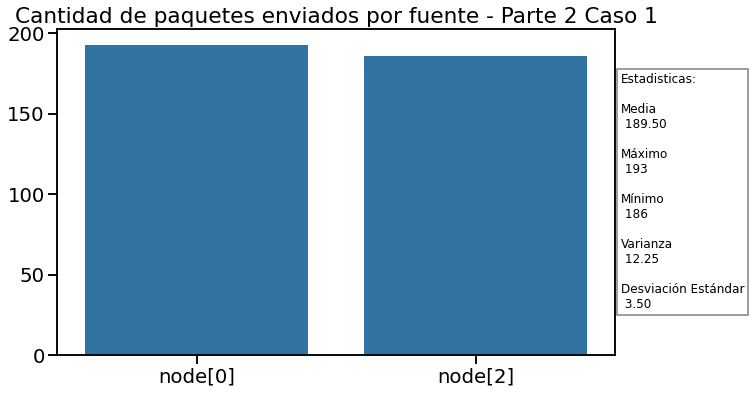


Parte 2, Caso 2:[6, 4, 6, 4, 7, 3, 0, 4, 6, 4, 7, 4, 6, 4, 0, 3, 0, 2, 6, 4, 6, 3, 0, 4, 6, 2, 7, 3, 6, 4, 0, 4, 6, 1, 7, 4, 7, 2, 7, 3, 6, 2, 7, 4, 6, 4, 0, 4, 7, 3, 0, 4, 6, 1, 7, 4, 0, 2, 7, 4, 6, 4, 6, 3, 0, 4, 6, 4, 6, 4, 6, 4, 7, 3, 6, 4, 6, 4, 7, 4, 6, 2, 7, 4, 0, 3, 6, 3, 0, 2, 6, 2, 6, 4, 0, 4, 6, 4, 0, 3, 6, 4, 0, 1, 7, 4, 0, 4, 0, 3, 6, 3, 7, 3, 6, 4, 7, 1, 6, 4, 0, 3, 0, 4, 7, 1, 6, 4, 0, 3, 6, 3, 7, 4, 6, 4, 0, 4, 6, 3, 6, 3, 7, 2, 6, 4, 6, 1, 7, 4, 0, 4, 7, 4, 6, 3, 7, 2, 0, 4, 6, 3, 7, 4, 6, 3, 7, 2, 6, 4, 7, 2, 0, 1, 7, 3, 6, 1, 6, 1, 7, 3, 6, 2, 6, 4, 7, 3, 0, 4, 7, 4, 7, 1, 0, 4, 6, 4, 0, 2, 7, 4, 6, 3, 0, 4, 6, 1, 7, 3, 6, 4, 6, 4, 0, 3, 0, 4, 6, 3, 6, 4, 7, 2, 7, 3, 6, 3, 0, 1, 6, 4, 7, 3, 6, 4, 6, 1, 0, 3, 6, 4, 6, 4, 0, 4, 6, 3, 6, 2, 7, 4, 6, 4, 7, 1, 6, 2, 7, 4, 0, 1, 6, 4, 6, 3, 7, 4, 6, 2, 0, 4, 6, 4, 6, 2, 7, 1, 6, 4, 7, 3, 7, 4, 0, 4, 7, 2, 6, 4, 0, 3, 6, 3, 6, 3, 0, 2, 7, 4, 7, 3, 0, 2, 6, 4, 0, 4, 6, 3, 0, 3, 7, 4, 6, 3, 0, 2, 6, 1, 6, 3, 6, 4, 0, 3, 0, 4

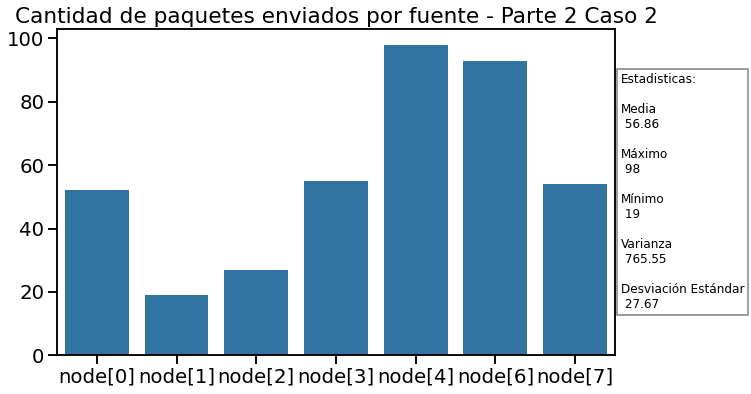

In [43]:
for p in range(2):
    parte = data[p]
    for c in range(len(parte)):
        caso = parte[c]

        # Extraemos los valores del vector de cada nodo en un array y lo guardamos en un array
        source_value = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'Source'), 'vecvalue'].tolist()
        source_value = list(map(int,source_value[0].split()))

        print(f"\nParte {p+1}, Caso {c+1}:" + str(source_value))
        # Crea un dict con key=source que envia al menos 1 y value como cotador de ocurrencias
        sourceNumbers = list(set(source_value))
        count_array = {key: 0 for key in sourceNumbers}

        # Itera sobre el array y cuenta las ocurrencias de cada número (source)
        for number in source_value:
            count_array[number] += 1

        # Convertimos el dict en un array
        count_array = list(count_array.values())
        assert sum(count_array) == len(source_value), "La cantidad de paquetes enviados no coincide"
        assert len(count_array) == len(sourceNumbers), "La cantidad de nodos no coincide"

        # Crea un array con los nombres de los nodos
        node_array = [f'node[{sourceNumbers[i]}]' for i in range(len(sourceNumbers))]

        # Graficamos 
        plt.figure(figsize=(10,6))
        plt.title(f'Cantidad de paquetes enviados por fuente - {file_names[p][c]}')
        seaborn.barplot(
            x=node_array,
            y=count_array)
        
        # Agregar estadísticas al gráfico
        mean_val = np.mean(count_array)
        max_val = np.max(count_array)
        min_val = np.min(count_array)
        variance_val = np.var(count_array)
        std_dev_val = np.std(count_array)
        stats_text = f'Estadisticas:\n\nMedia\n {mean_val:.2f}\n\nMáximo\n {max_val}\n\nMínimo\n {min_val}\n\nVarianza\n {variance_val:.2f}\n\nDesviación Estándar\n {std_dev_val:.2f}'
        plt.gca().text(1.01, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

        if guardar_graficos:
            # Guarda la figura en el folder especificado
            file_path = os.path.join(output_folder, CantidadXFuente_Node5 + f'_P{p + 1}C{c + 1}.png')
            plt.savefig(file_path)
            print(f"Gráfico guardado en {file_path}")

        plt.show()
        plt.close()

## Cantidad de saltos utilizados por cada paquete por fuente
PD: Se cuentan al llegar a la app, osea al node 5. link 0

Gráfico guardado en ./IMGs/SaltosXFuente_Node5_P1C1.png


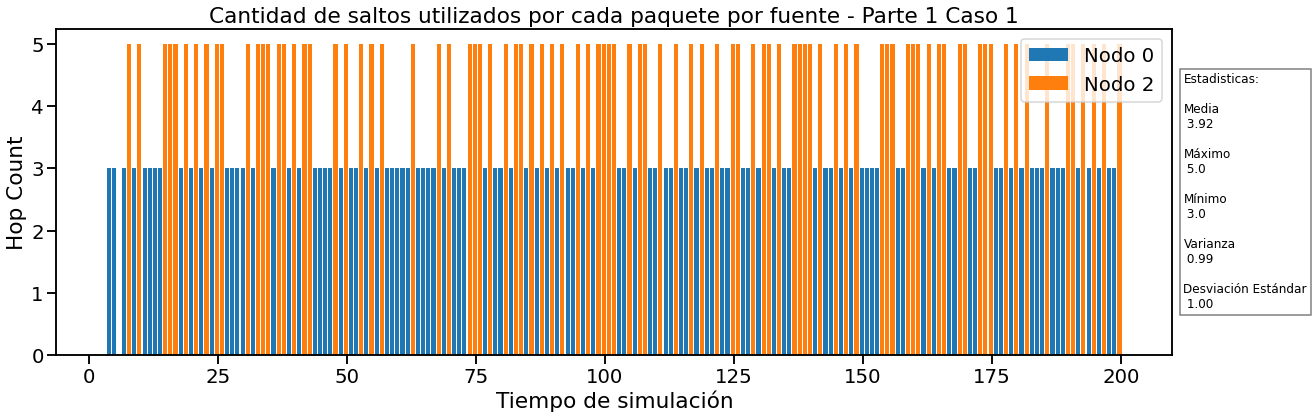

Gráfico guardado en ./IMGs/SaltosXFuente_Node5_P1C2.png


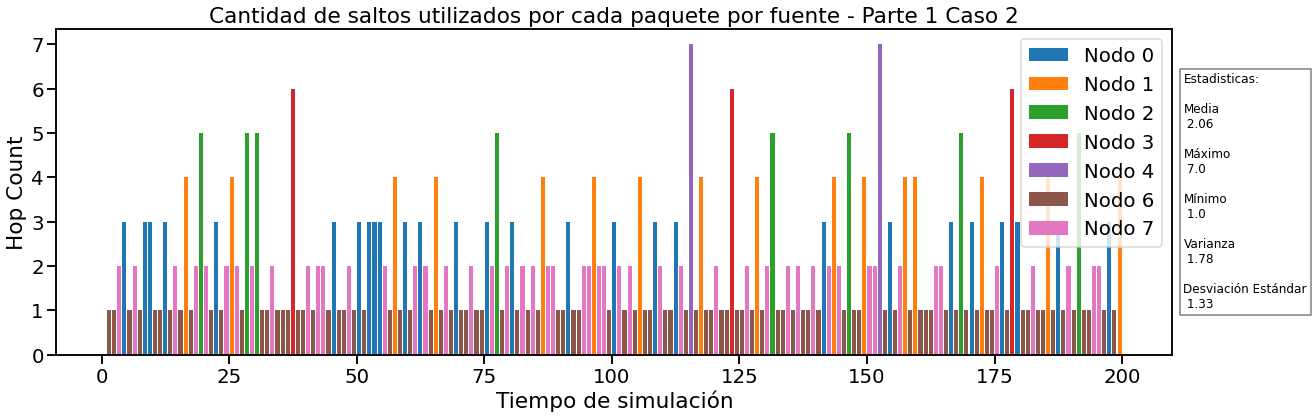

Gráfico guardado en ./IMGs/SaltosXFuente_Node5_P2C1.png


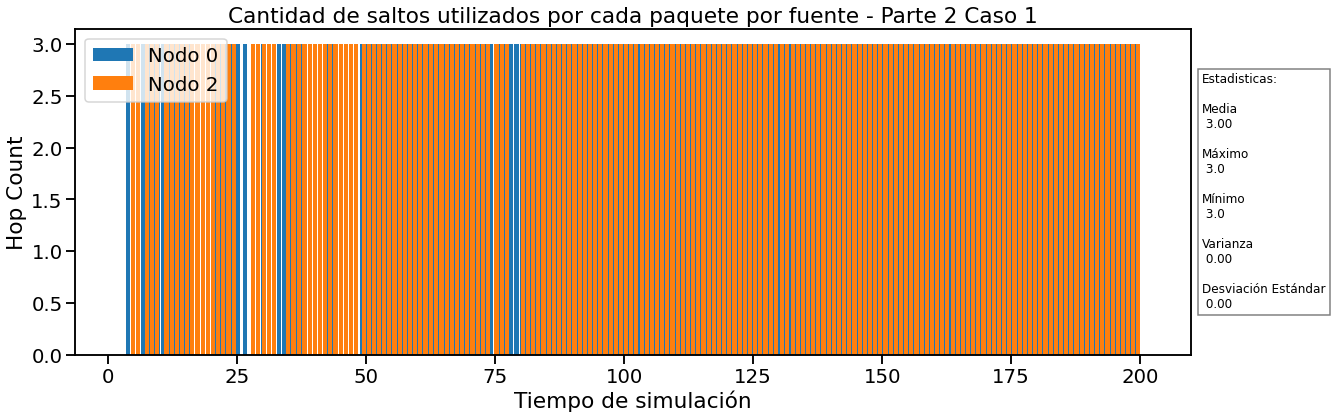

Gráfico guardado en ./IMGs/SaltosXFuente_Node5_P2C2.png


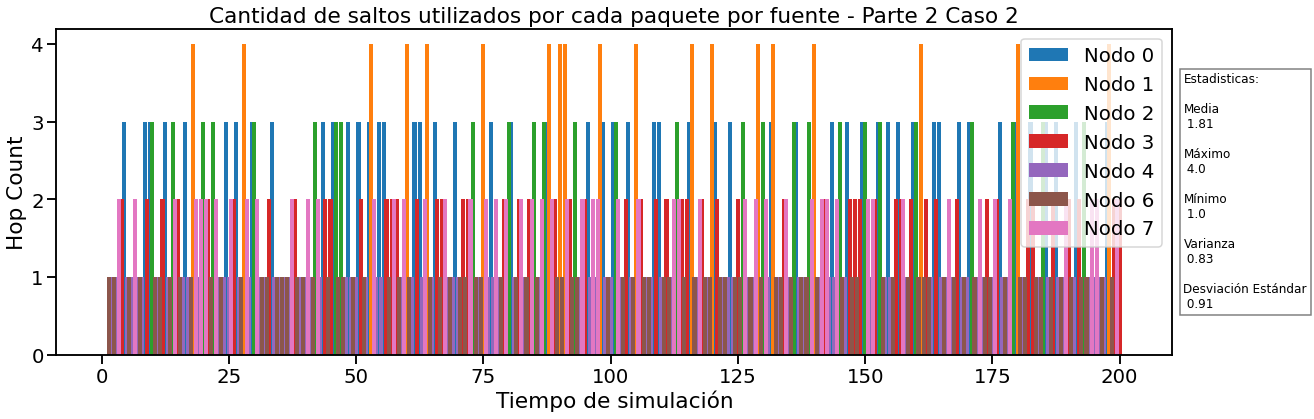

In [44]:
for p in range(2):
    parte = data[p]
    for c in range(len(parte)):
        caso = parte[c]

        #  Extraemos los valores
        hopCount_time = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'hopCount'), 'vectime'].tolist()
        hopCount_time = list(map(float,hopCount_time[0].split()))

        hopCount_value = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'hopCount'), 'vecvalue'].tolist()
        hopCount_value = list(map(float,hopCount_value[0].split()))

        source_value = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'Source'), 'vecvalue'].tolist()
        source_value = list(map(int,source_value[0].split()))

        source_time = caso.loc[(caso['module'] == 'Network.node[5].net') & (caso['name'] == 'Source'), 'vectime'].tolist()
        source_time = list(map(float,source_time[0].split()))

        # Calculamos el hopCount de cada source
        assert hopCount_time == source_time, "Los tiempos de los delay y source no coinciden"
        sourceNumbers = list(set(source_value))
        hopCount_source = {key: [] for key in sourceNumbers}
        time_source = {key: [] for key in sourceNumbers}
        for i in range(len(hopCount_time)): 
            hopCount_source[source_value[i]].append(hopCount_value[i])
            time_source[source_value[i]].append(hopCount_time[i])
        size = 0
        for i in sourceNumbers:
            size = size + len(hopCount_source[i])
            assert size <= len(hopCount_value), f"Los tamaños de los datos no coinciden"
        
        # # Graficamos el gráfico de líneas
        # plt.figure(figsize=(20, 6))
        # plt.plot(hopCount_time, hopCount_value, color='tab:orange', label='Hop Count')
        # plt.title(f'Cantidad de saltos utilizados por cada paquete - {file_names[p][c]}')
        # plt.xlabel('Tiempo de simulación')
        # plt.ylabel('Hop Count')
        # plt.legend()
        # plt.show()
        
        # Graficamos el gráfico de barras
        plt.figure(figsize=(20, 6))
        for i in range(len(sourceNumbers)):
            plt.bar(time_source[sourceNumbers[i]],hopCount_source[sourceNumbers[i]], label=f"Nodo {sourceNumbers[i]}")
        plt.title(f'Cantidad de saltos utilizados por cada paquete por fuente - {file_names[p][c]}')
        plt.xlabel('Tiempo de simulación')
        plt.ylabel('Hop Count')
        # plt.xticks(hopCount_time)
        # plt.yticks(hopCount_value)
        plt.legend()

        # Agregar estadísticas al gráfico
        mean_val = np.mean(hopCount_value)
        max_val = np.max(hopCount_value)
        min_val = np.min(hopCount_value)
        variance_val = np.var(hopCount_value)
        std_dev_val = np.std(hopCount_value)
        stats_text = f'Estadisticas:\n\nMedia\n {mean_val:.2f}\n\nMáximo\n {max_val}\n\nMínimo\n {min_val}\n\nVarianza\n {variance_val:.2f}\n\nDesviación Estándar\n {std_dev_val:.2f}'
        plt.gca().text(1.01, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))


        if guardar_graficos:
            # Guarda la figura en el folder especificado
            file_path = os.path.join(output_folder, SaltosXFuente_Node5 + f'_P{p + 1}C{c + 1}.png')
            plt.savefig(file_path)
            print(f"Gráfico guardado en {file_path}")

        plt.show()
        plt.close()

## Utilización de los buffers de la red


Parte 1, Caso 1: 
buffer:[586, 1, 374, 1, 377, 1, 1, 1, 1, 1, 1, 1, 394, 1, 396, 1]
time:[586, 1, 374, 1, 377, 1, 1, 1, 1, 1, 1, 1, 394, 1, 396, 1]
Gráfico guardado en ./IMGs/Bufferes_P1C1.png


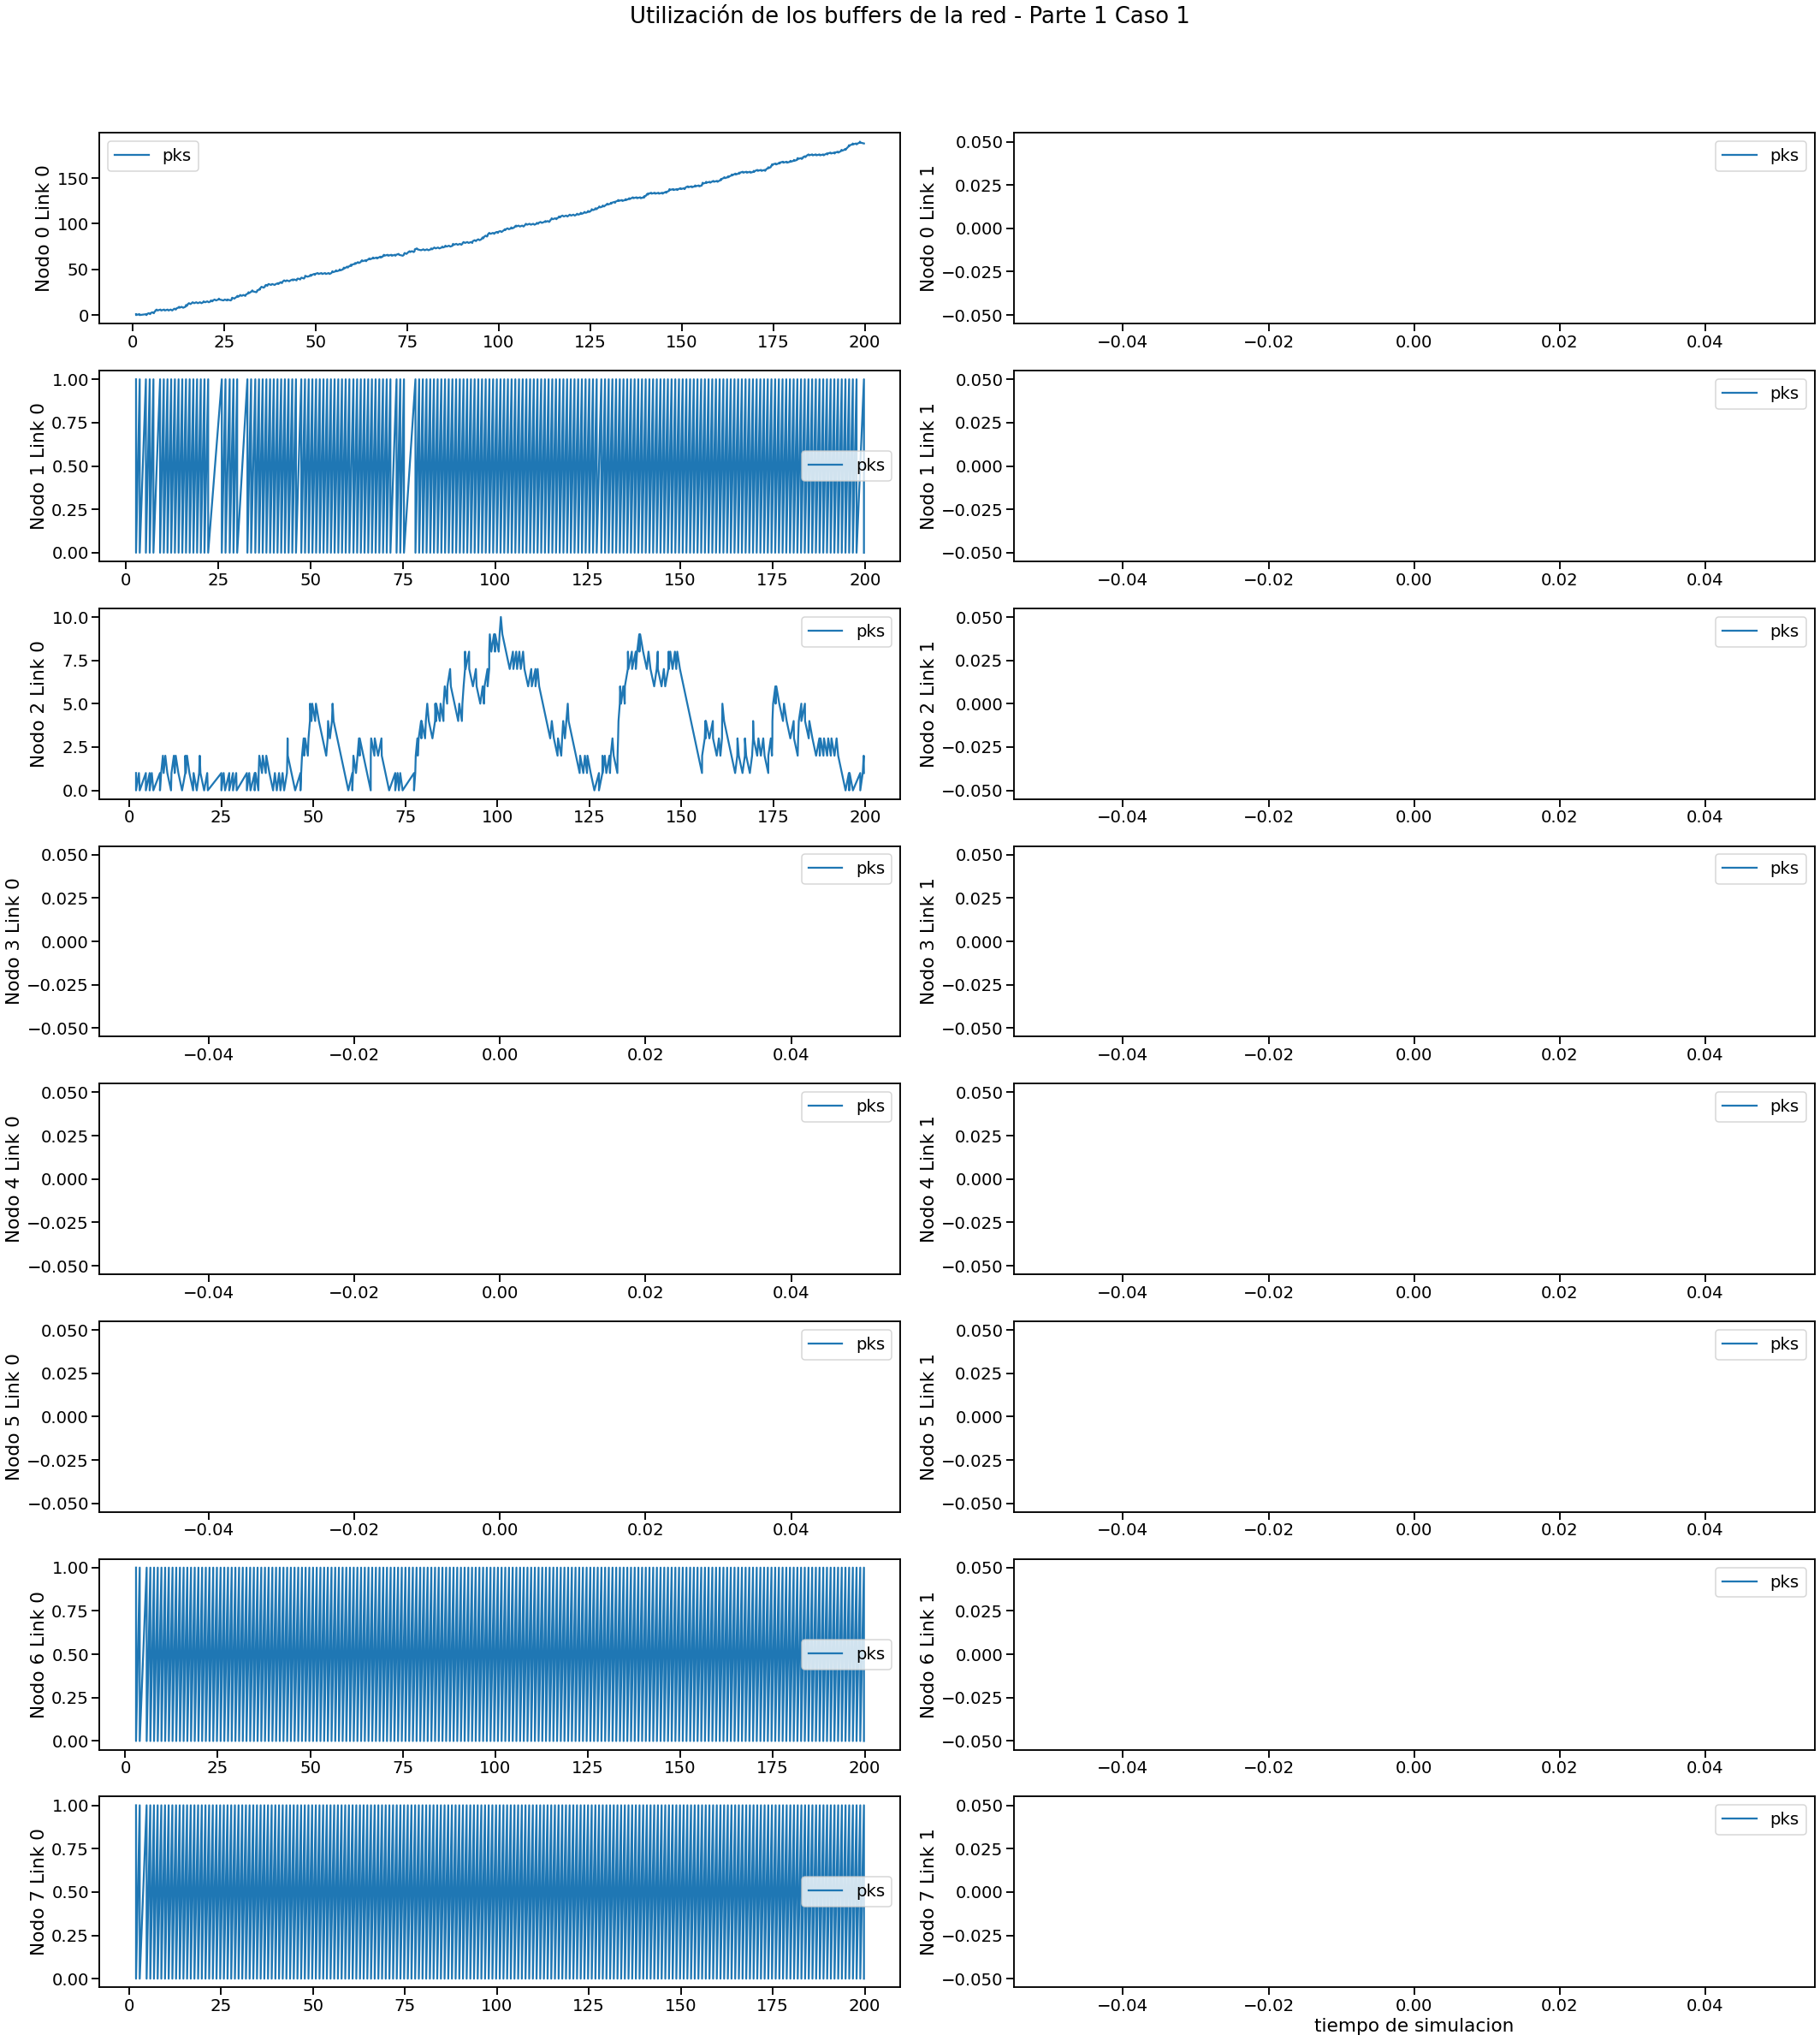


Parte 1, Caso 2: 
buffer:[602, 1, 593, 1, 622, 1, 570, 1, 380, 1, 1, 1, 564, 1, 605, 1]
time:[602, 1, 593, 1, 622, 1, 570, 1, 380, 1, 1, 1, 564, 1, 605, 1]
Gráfico guardado en ./IMGs/Bufferes_P1C2.png


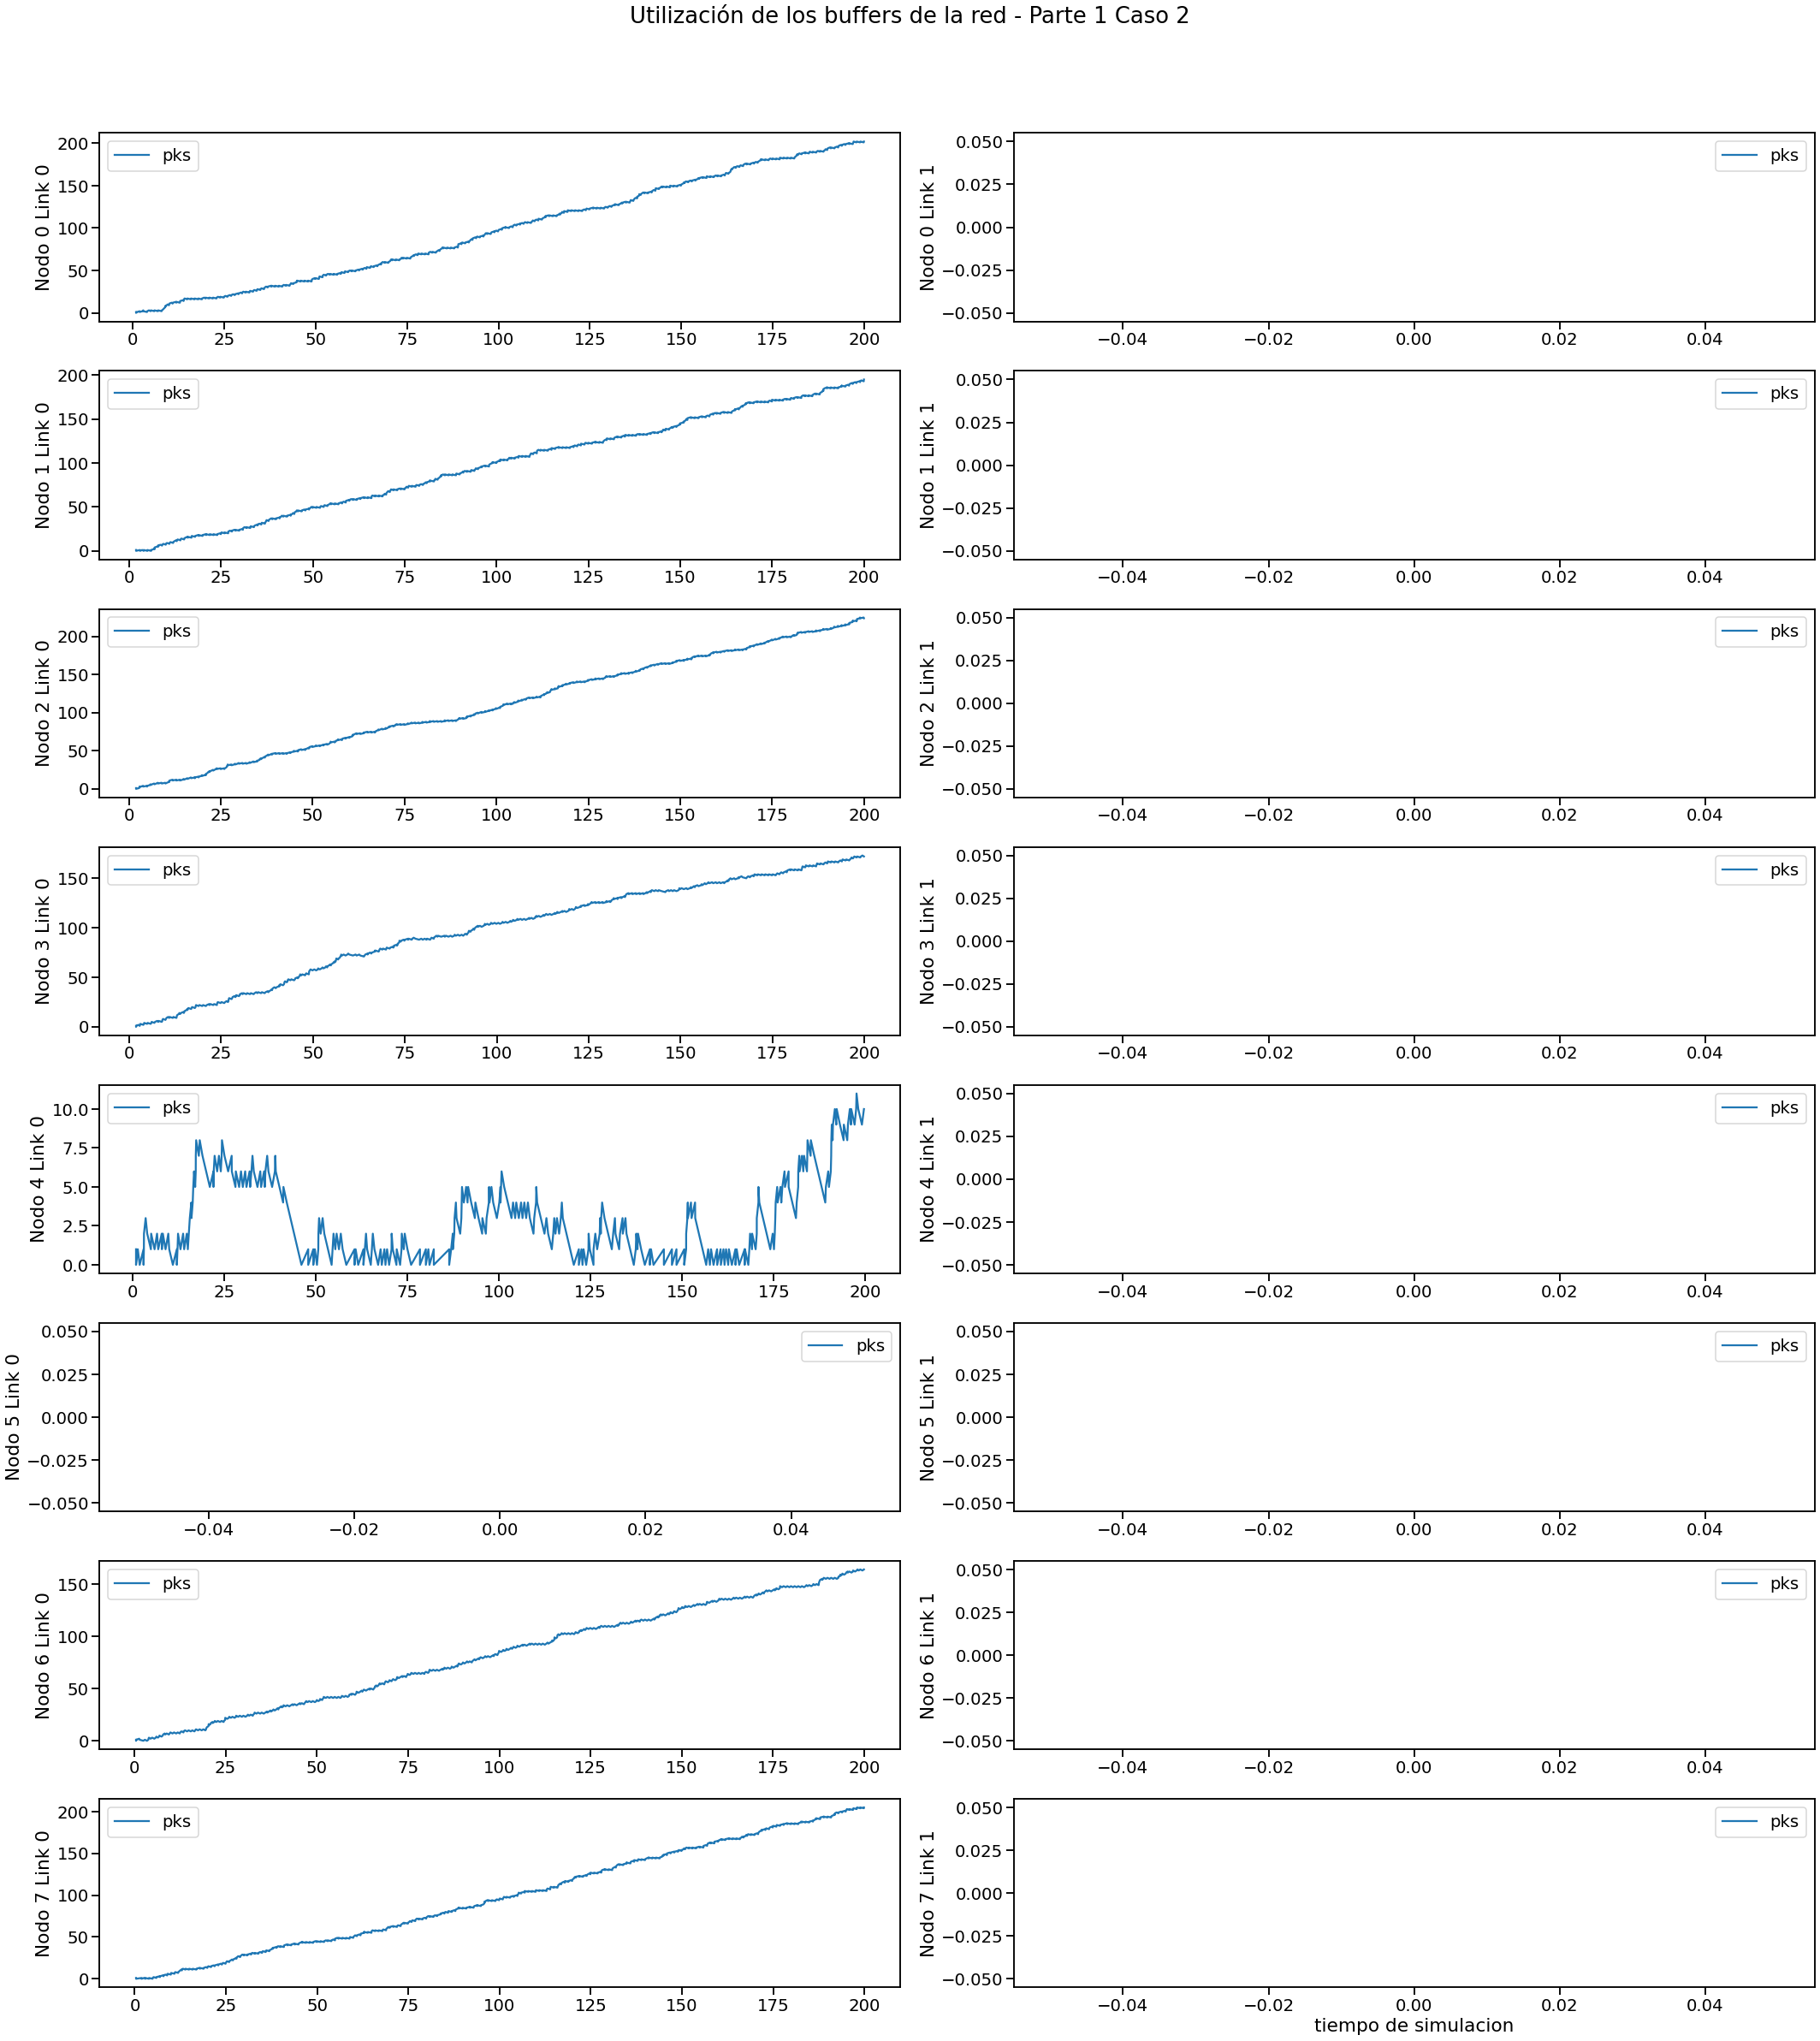


Parte 2, Caso 1: 
buffer:[429, 1, 32, 1, 32, 377, 32, 374, 32, 372, 32, 1, 420, 1, 422, 1]
time:[429, 1, 32, 1, 32, 377, 32, 374, 32, 372, 32, 1, 420, 1, 422, 1]
Gráfico guardado en ./IMGs/Bufferes_P2C1.png


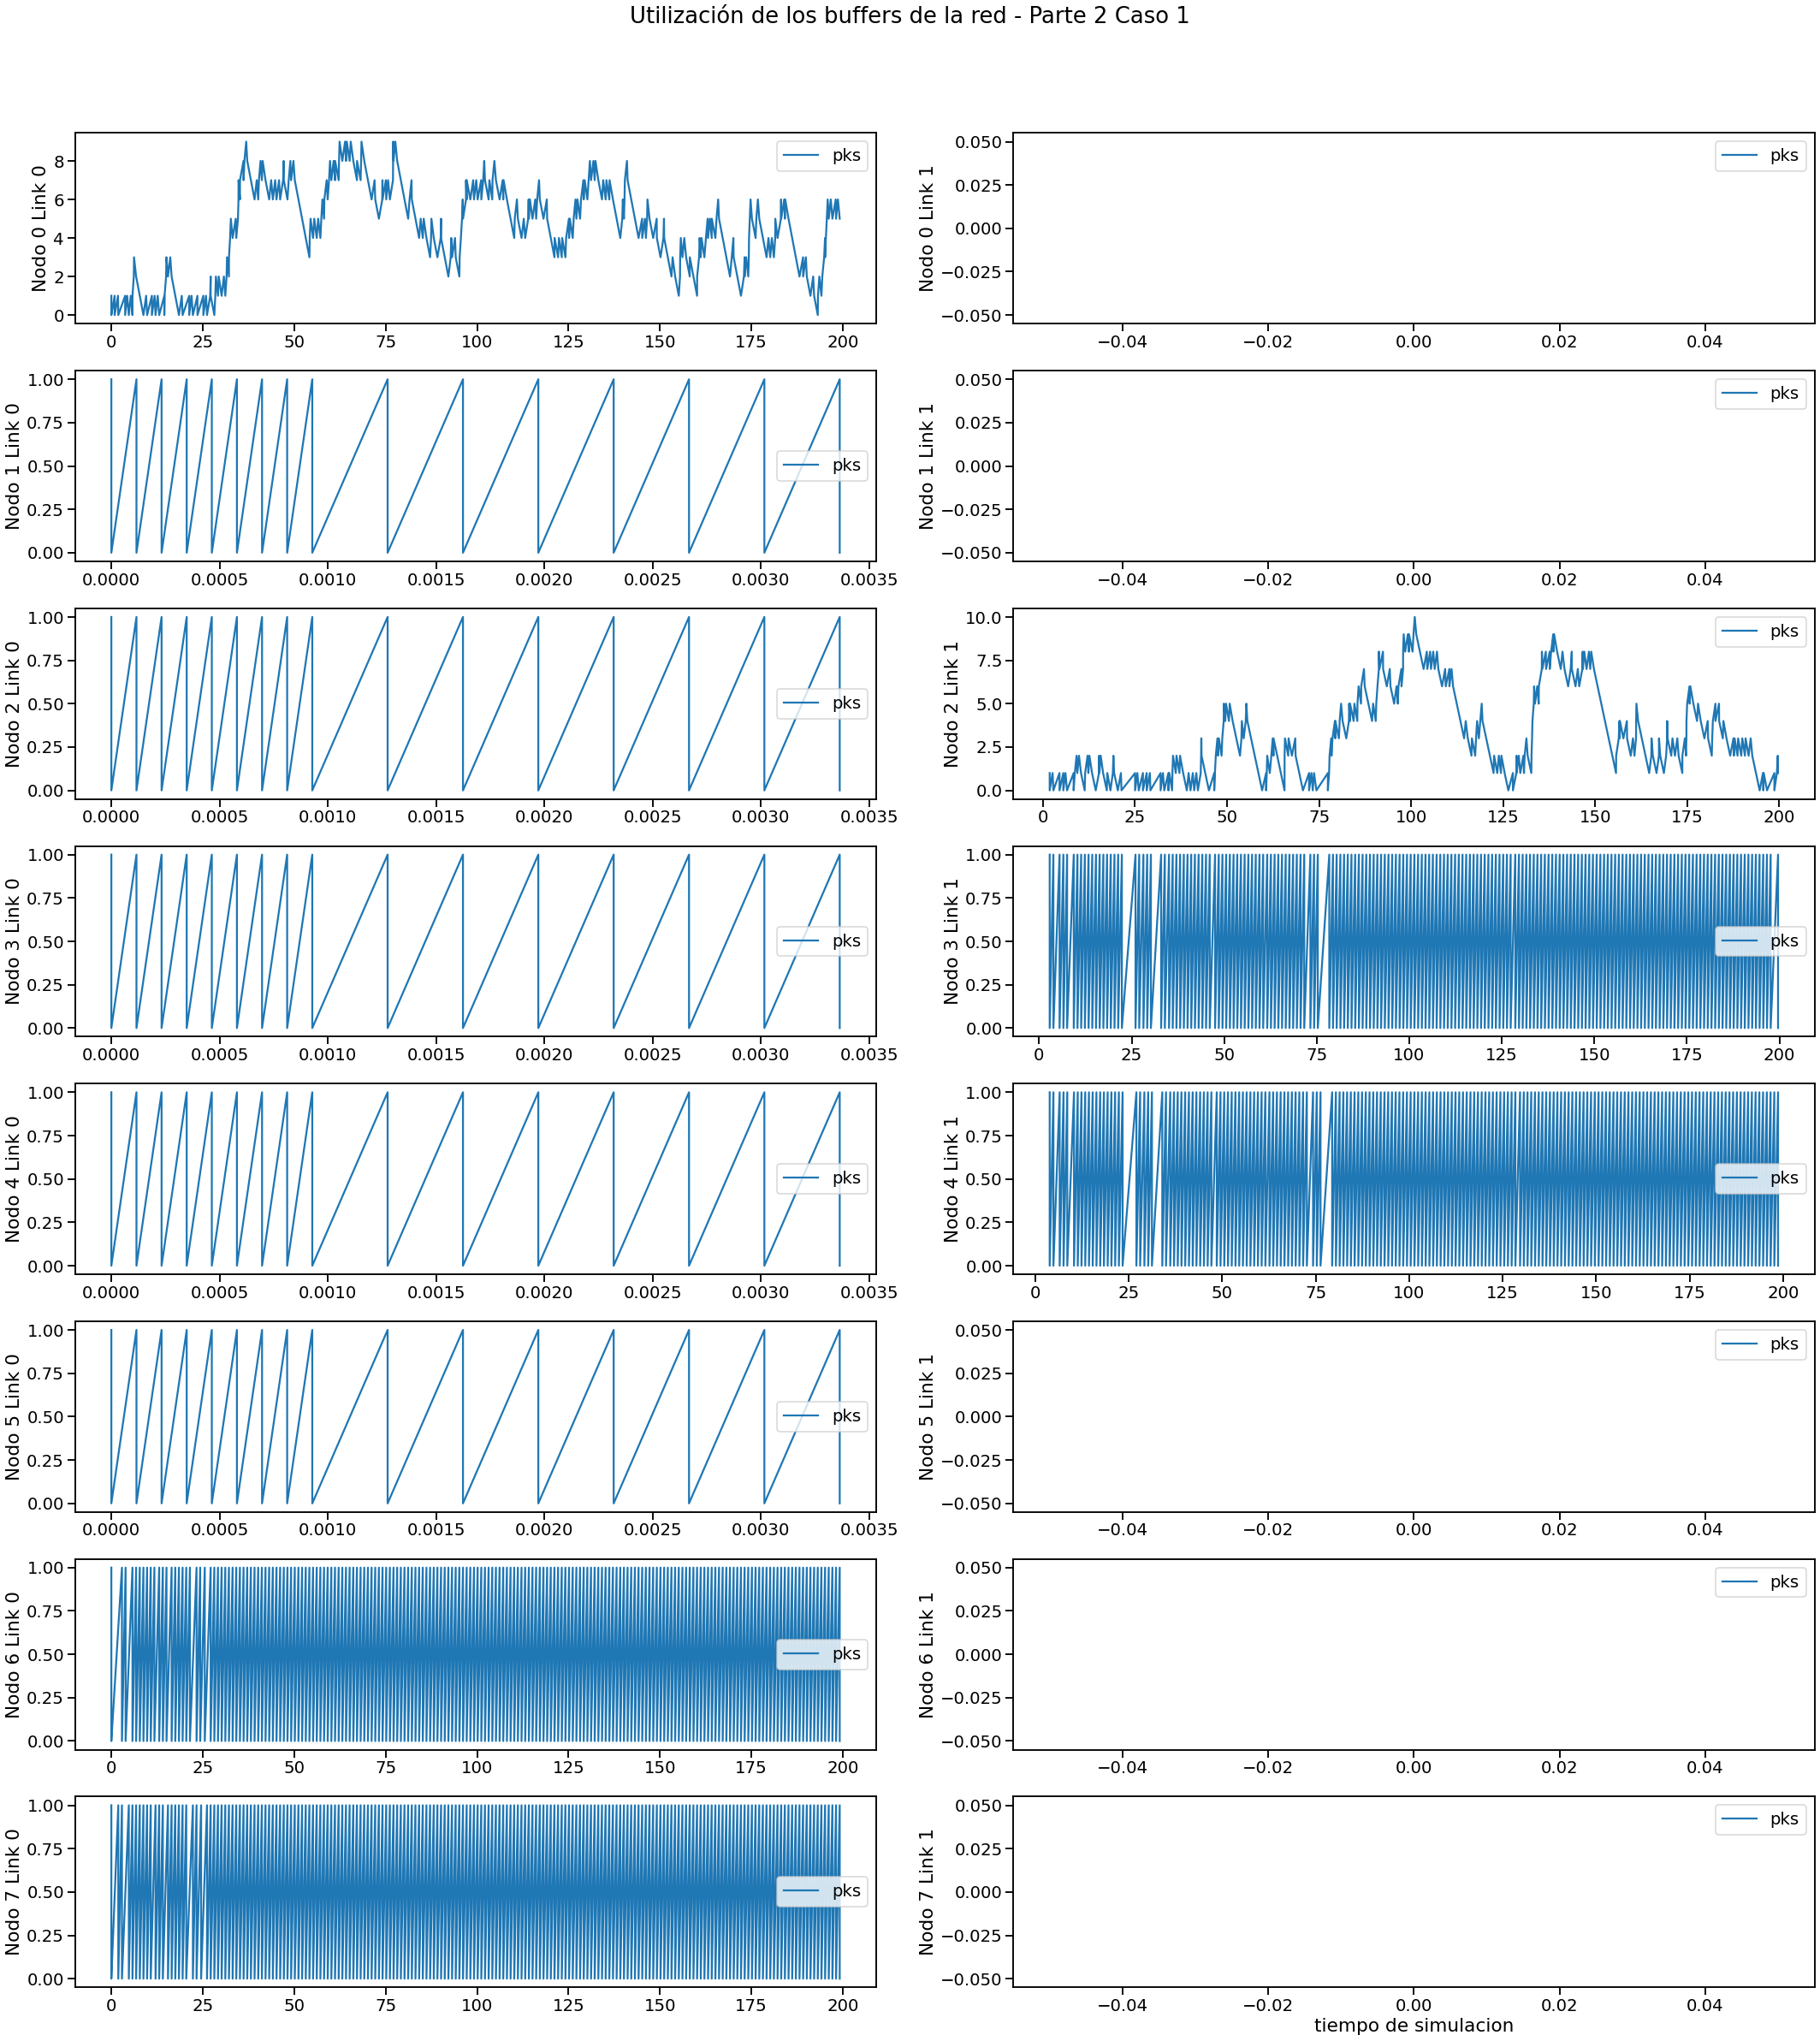


Parte 2, Caso 2: 
buffer:[427, 1, 32, 388, 32, 615, 32, 584, 32, 593, 32, 1, 596, 1, 628, 1]
time:[427, 1, 32, 388, 32, 615, 32, 584, 32, 593, 32, 1, 596, 1, 628, 1]
Gráfico guardado en ./IMGs/Bufferes_P2C2.png


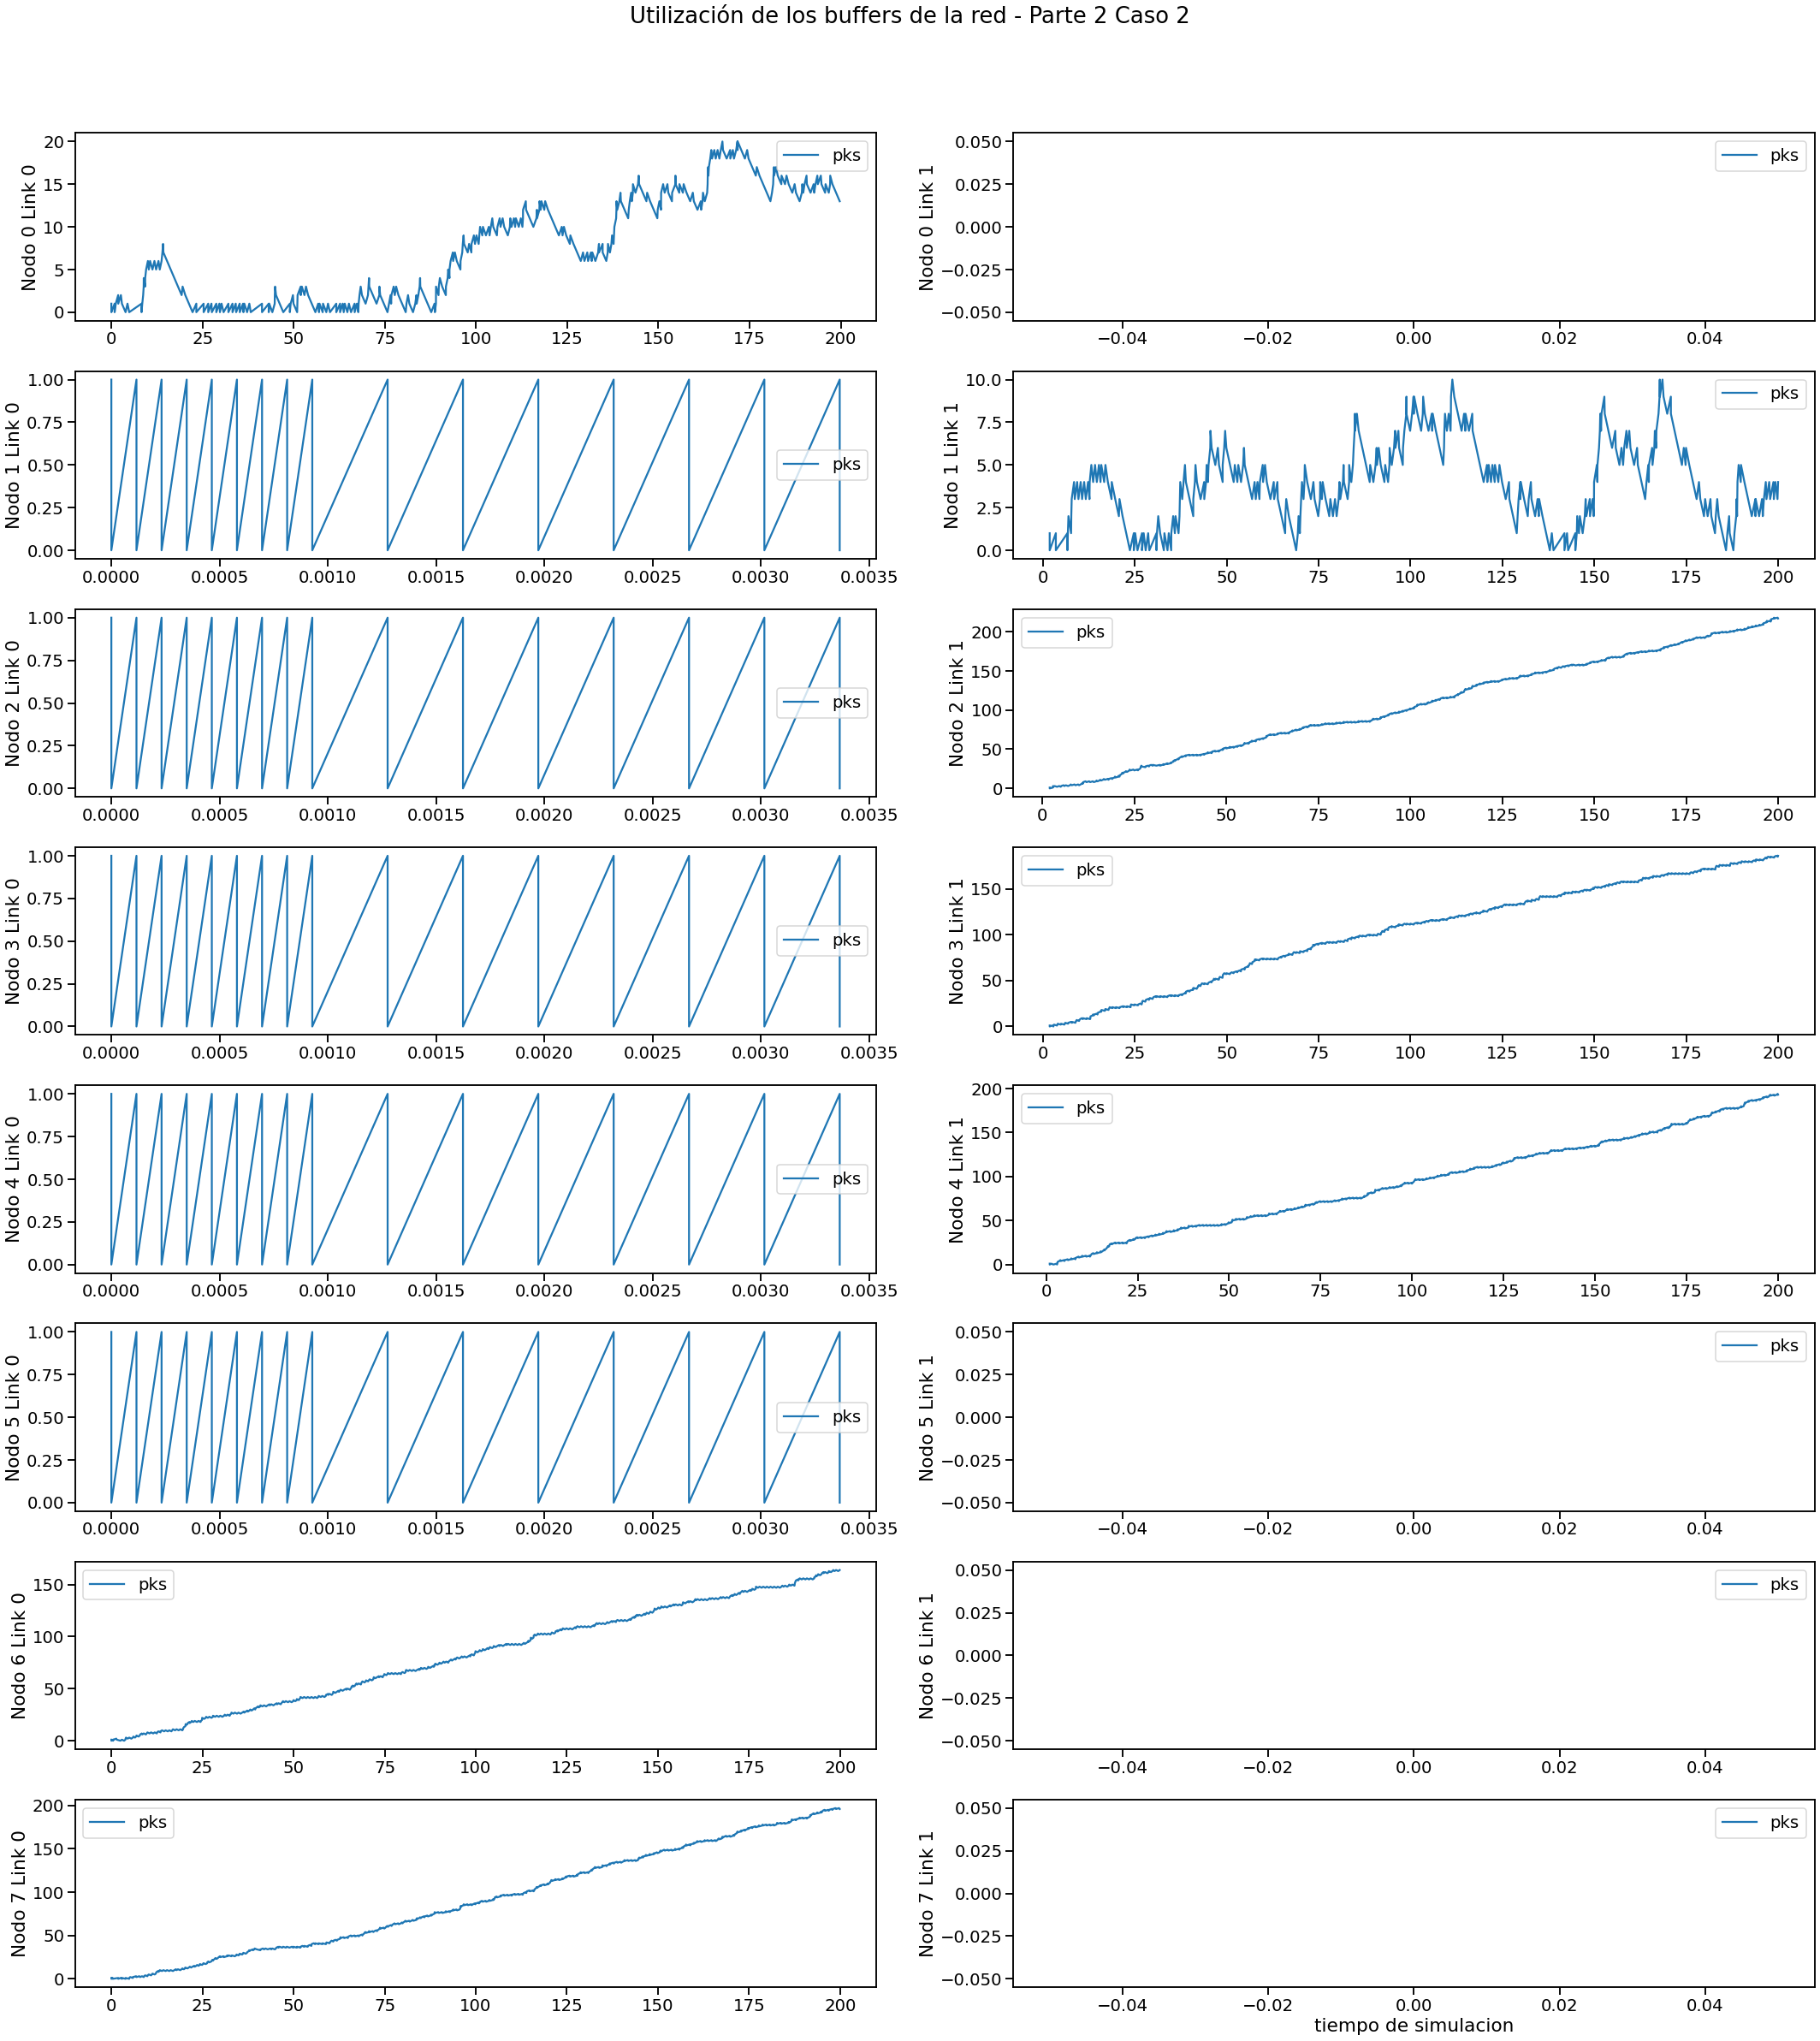

In [45]:
for p in range(2):
    parte = data[p]
    for c in range(len(parte)):
        caso = parte[c]

        # Extraemos los valores del vector de cada nodo en un array y lo guardamos en un array
        time_node = [[0]] * nodes_number * 2
        buffer_node = [[0]] * nodes_number * 2
        for i in range(nodes_number):
            time_lnk0 = caso.loc[(caso['module'] == f'Network.node[{i}].lnk[0]') & (caso['name'] == 'Buffer Size'), 'vectime'].tolist()
            buffer_lnk0 = caso.loc[(caso['module'] == f'Network.node[{i}].lnk[0]') & (caso['name'] == 'Buffer Size'), 'vecvalue'].tolist()

            time_lnk1 = caso.loc[(caso['module'] == f'Network.node[{i}].lnk[1]') & (caso['name'] == 'Buffer Size'), 'vectime'].tolist()
            buffer_lnk1 = caso.loc[(caso['module'] == f'Network.node[{i}].lnk[1]') & (caso['name'] == 'Buffer Size'), 'vecvalue'].tolist()

            # convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
            time_lnk0 = list(map(float,time_lnk0[0].split())) if time_lnk0 else [0]
            buffer_lnk0 = list(map(float,buffer_lnk0[0].split())) if buffer_lnk0 else [0]

            time_lnk1 = list(map(float,time_lnk1[0].split())) if time_lnk1 else [0]
            buffer_lnk1 = list(map(float,buffer_lnk1[0].split())) if buffer_lnk1 else [0]

            # unimos los valores de los dos links en un solo array
            time_node[2*i] = time_lnk0
            buffer_node[2*i] = buffer_lnk0

            time_node[2*i+1] = time_lnk1
            buffer_node[2*i+1] = buffer_lnk1

        print(f"\nParte {p+1}, Caso {c+1}: \nbuffer:" + str([len(sublista) for sublista in buffer_node]) + "\ntime:" + str([len(sublista) for sublista in time_node]))
        # Graficamos
        fig, ax = plt.subplots(nodes_number, 2, figsize=(30, 35))  # 2 columnas
        fig.suptitle(f'Utilización de los buffers de la red - {file_names[p][c]}')
        plt.xlabel("tiempo de simulacion")
        
        for i in range(nodes_number):
            for j in range(0, 2):
                ax[i, j].plot(time_node[2*i+j], buffer_node[2*i+j], label="pks")
                ax[i, j].set_ylabel(f"Nodo {i} Link {j}")
                ax[i, j].legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # ajusta el espacio para el título

        if guardar_graficos:
            # Guarda la figura en el folder especificado
            file_path = os.path.join(output_folder, Bufferes + f'_P{p + 1}C{c + 1}.png')
            fig.savefig(file_path)
            print(f"Gráfico guardado en {file_path}")

        plt.show()
        plt.close(fig)

## Entrega de paquetes a la app del node 5

In [46]:
for p in range(2):
    parte = data[p]
    for c in range(len(parte)):
        caso = parte[c]

        # Extraemos los valores del vector de cada nodo en un array y lo guardamos en un array
        delayToNode5_time = caso.loc[(caso['module'] == 'Network.node[5].app') & (caso['name'] == 'Delay'), 'vectime'].tolist()
        delayToNode5_value = caso.loc[(caso['module'] == 'Network.node[5].app') & (caso['name'] == 'Delay'), 'vecvalue'].tolist()
        
        # convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
        delayToNode5_time = list(map(float,delayToNode5_time[0].split()))
        delayToNode5_value = list(map(float,delayToNode5_value[0].split()))
        
        # Graficamos el gráfico de líneas
        plt.figure(figsize=(20, 6))
        plt.bar(delayToNode5_time, delayToNode5_value, color='tab:blue', label='Delay')
        plt.title(f'Entrega de paquetes a la app del node 5 - {file_names[p][c]}')
        plt.xlabel('Tiempo de simulación')
        plt.ylabel('Delay')
        plt.legend()

        # Agregar estadísticas al gráfico
        mean_val = np.mean(delayToNode5_value)
        max_val = np.max(delayToNode5_value)
        min_val = np.min(delayToNode5_value)
        variance_val = np.var(delayToNode5_value)
        std_dev_val = np.std(delayToNode5_value)
        stats_text = f'Estadisticas:\n\nMedia\n {mean_val:.2f}\n\nMáximo\n {max_val}\n\nMínimo\n {min_val}\n\nVarianza\n {variance_val:.2f}\n\nDesviación Estándar\n {std_dev_val:.2f}'
        plt.gca().text(1.01, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

        if guardar_graficos:
            # Guarda la figura en el folder especificado
            file_path = os.path.join(output_folder, Delay_Node5 + f'_P{p + 1}C{c + 1}.png')
            plt.savefig(file_path)
            plt.close()  # Cierra la figura para liberar memoria
            print(f"Gráfico guardado en {file_path}")

        plt.show()
        plt.close()

Gráfico guardado en ./IMGs/Delay_Node5_P1C1.png
Gráfico guardado en ./IMGs/Delay_Node5_P1C2.png
Gráfico guardado en ./IMGs/Delay_Node5_P2C1.png
Gráfico guardado en ./IMGs/Delay_Node5_P2C2.png
